In [ ]:
cd ../tables

In [45]:
from astropy.table import Table
import numpy as np

In [49]:
mtab = Table.read("gfit_M_cat_NB.csv", format='ascii.csv')
ntab = Table.read("gfit_N_cat_NB.csv", format='ascii.csv')

In [28]:
%matplotlib inline
import pylab as pl
from astropy import units as u
from astropy import coordinates
from astropy.visualization import quantity_support
pl.rcParams['figure.facecolor'] = 'w'
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2ac031bb4e80>

In [17]:
def get_qty(x):
    unit = x[0].split()[-1]
    return u.Quantity([float(z.split()[0]) for z in x if z], unit=unit) 

Text(0, 0.5, 'Minor (arcsec)')

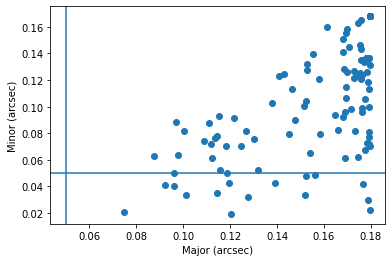

In [20]:
pl.scatter(get_qty(mtab['deconv_fwhm_major']), get_qty(mtab['deconv_fwhm_minor']))
pl.axhline(0.05)
pl.axvline(0.05)
pl.xlabel("Major (arcsec)")
pl.ylabel("Minor (arcsec)")

In [16]:
mtab['deconv_fwhm_major'][:5]

0.17313018315188594 arcsec
--
0.17461641948728984 arcsec
0.12758596234584796 arcsec
0.15144047309114297 arcsec


In [24]:
mcx,mcy = map(get_qty, (mtab['center_x'], mtab['center_y']))

In [29]:
mcoord = coordinates.SkyCoord(mcx, mcy, frame='icrs')

In [50]:
midx, msep, _d3d = mcoord.match_to_catalog_sky(mcoord, nthneighbor=2)

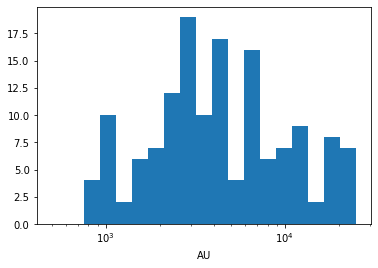

In [52]:
pl.hist((msep*8*u.kpc).to(u.au, u.dimensionless_angles()), bins=np.geomspace(500, 25000, 20))
pl.xscale('log')

In [53]:
ncx,ncy = map(get_qty, (ntab['center_x'], ntab['center_y']))
ncoord = coordinates.SkyCoord(ncx, ncy, frame='icrs')
nidx, nsep, _d3d = ncoord.match_to_catalog_sky(ncoord, nthneighbor=2)

In [63]:
pl.rcParams['font.size'] = 16
pl.rcParams['figure.figsize'] = (8,6)

Text(0, 0.5, 'Number of sources')

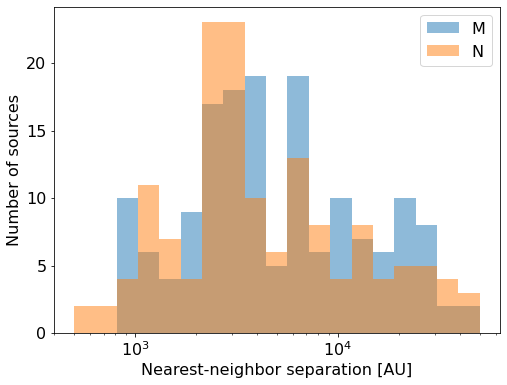

In [65]:
pl.hist((msep*8*u.kpc).to(u.au, u.dimensionless_angles()), bins=np.geomspace(500, 50000, 20), alpha=0.5, label='M')
pl.hist((nsep*8*u.kpc).to(u.au, u.dimensionless_angles()), bins=np.geomspace(500, 50000, 20), alpha=0.5, label='N')
pl.xscale('log')
pl.legend(loc='best')
pl.xlabel("Nearest-neighbor separation [AU]")
pl.ylabel("Number of sources")

Text(0, 0.5, 'Number of sources')

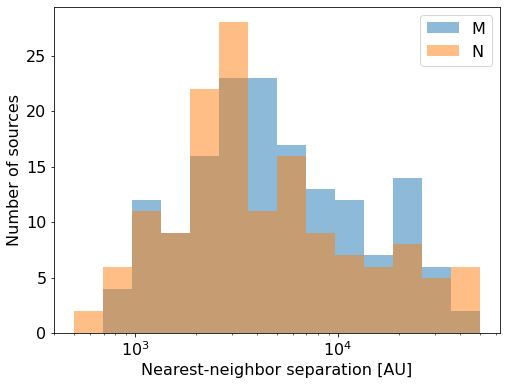

In [66]:
pl.hist((msep*8*u.kpc).to(u.au, u.dimensionless_angles()), bins=np.geomspace(500, 50000, 15), alpha=0.5, label='M')
pl.hist((nsep*8*u.kpc).to(u.au, u.dimensionless_angles()), bins=np.geomspace(500, 50000, 15), alpha=0.5, label='N')
pl.xscale('log')
pl.legend(loc='best')
pl.xlabel("Nearest-neighbor separation [AU]")
pl.ylabel("Number of sources")

In [67]:
from sedfitter.sed import SEDCube
seds = SEDCube.read(f'/orange/adamginsburg/robitaille_models/spubhmi/flux.fits')

In [75]:
pars = Table.read('/blue/adamginsburg/richardson.t/research/flux/pars/spubhmi_augmented.fits')

In [68]:
seds.apertures[:4]

<Quantity [100.        , 162.37767392, 263.66508987, 428.13323987] AU>

In [87]:
(450*u.GHz).to(u.um, u.spectral())

<Quantity 666.20546222 um>

In [71]:
np.argmin(np.abs(seds.wav - 850*u.um))

27

In [88]:
np.argmin(np.abs(seds.wav - 650*u.um))

31

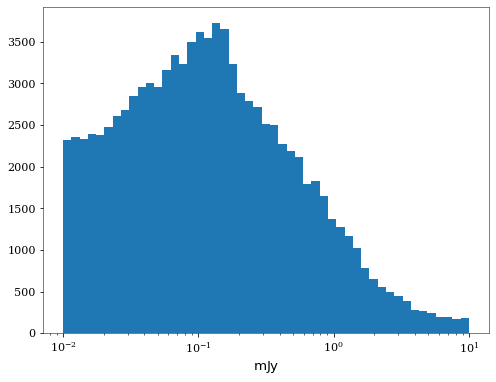

In [74]:
# 8 kpc ^2
pl.hist(seds.val[:,0,27] / 8**2, bins=np.geomspace(10*u.uJy, 10*u.mJy))
pl.xscale('log')

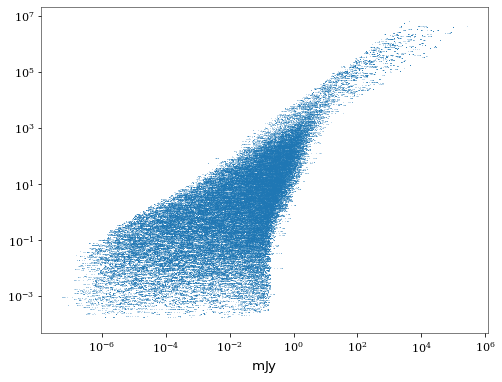

In [80]:
# 8 kpc ^2
pl.loglog(seds.val[:,0,27] / 8**2, pars['Model Luminosity'], ',', alpha=0.25)

100 microJy gives
$M_{disk}^{2.25} L_* > 2\times10^{-5}$

$

In [117]:
1e-5 / 1e-3**2.25

56.23413251903491

In [120]:
(140/8500)**2 * 10**0.5

0.0008578635590214567

# Andrews+ scaling relations from tbl1 of
https://iopscience.iop.org/article/10.3847/1538-4357/aadd9f/pdf

In [121]:
# Log(L_mm) = -0.69 + 1.5 log(M) 
10**-0.69 * (140/8500)**2

5.5388323481692434e-05

we want $L_{mm} = 100 uJy (M/M_x)^{1.5} = 55 (M/M_\odot)^{1.5}$

In [127]:
(10**-0.69 * (140/8500)**2 / 100e-6)**(-1/1.5)

1.4827042077752763

In [122]:
10**-0.88 * (140/8500)**2

3.5761705295094224e-05

In [132]:
(100e-6 / (10**-0.88 * (140/8500)**2))**(1/0.84)

3.401300291334948

In [133]:
(100/35)**(1/0.84)

3.4896039327310935

# Andrews on Robitaille

In [142]:
-0.88 - np.log10(140/8500)*2

2.6865817800721095

In [143]:
10**(-0.88 + np.log10(140/8500)*2)

485.9390273505124

In [184]:
import sys
sys.path.append('/orange/adamginsburg/repos/imf')
import imf

In [ ]:
meanmass = imf.kroupa.m_integrate(1,150)[0]/imf.kroupa.integrate(1,150)[0]
meanmass

3.3093450510345805

In [188]:
meanmass = imf.kroupa.m_integrate(0.03,150)[0]/imf.kroupa.integrate(0.03,150)[0]
meanmass

0.4339293611895671

In [198]:
imf.kroupa.integrate(2.26, 150)[0] * (1e4 / meanmass) 

558.4403560287417

In [196]:
[(imf.make_cluster(1e4) > 1.5).sum() for ii in range(10)]

Total cluster mass is 9993.09 (limit was 10000)
Total cluster mass is 9999.21 (limit was 10000)
Total cluster mass is 9999.7 (limit was 10000)
Total cluster mass is 9997.7 (limit was 10000)
Total cluster mass is 10000.1 (limit was 10000)
Total cluster mass is 10001.1 (limit was 10000)
Total cluster mass is 9999.91 (limit was 10000)
Total cluster mass is 10000.7 (limit was 10000)
Total cluster mass is 10001.1 (limit was 10000)
Total cluster mass is 9996.44 (limit was 10000)


[979, 926, 896, 919, 948, 877, 869, 919, 980, 1058]

Text(0.5, 0, 'Luminosity')

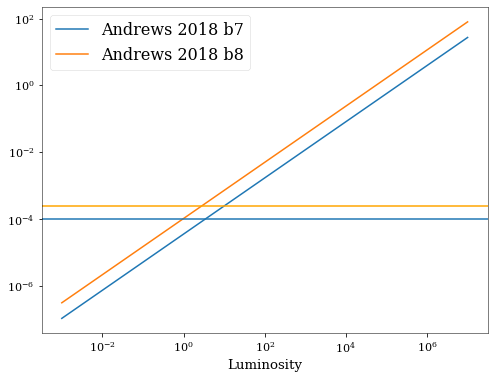

In [204]:
pl.loglog(np.logspace(-3,7), 10**(-0.88 + np.log10(140/8500)*2)*10**(0.84*np.linspace(-3,7)), label='Andrews 2018 b7')
pl.loglog(np.logspace(-3,7), 10**(-0.88 + np.log10(140/8500)*2)*10**(0.84*np.linspace(-3,7))*(850/650)**4, label='Andrews 2018 b8')
pl.legend(loc='best')
pl.axhline(1e-4)
pl.axhline(2.5e-4, color='orange')
pl.xlabel("Luminosity")

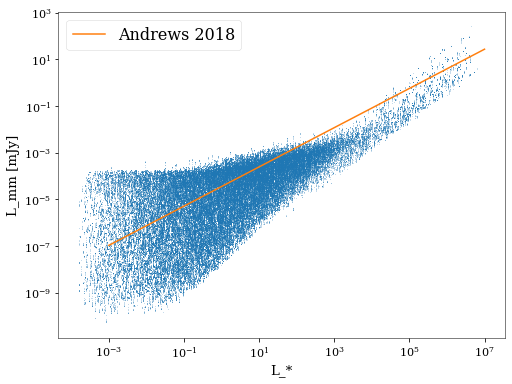

In [151]:
pl.loglog(pars['Model Luminosity'], seds.val[:,0,27] / 8.5**2 / 1e3, ',', alpha=0.25)
pl.loglog(np.logspace(-3,7), 10**(-0.88 + np.log10(140/8500)*2)*10**(0.84*np.linspace(-3,7)), label='Andrews 2018')
pl.xlabel("L_*")
pl.ylabel("L_mm [mJy]")
pl.legend(loc='best')

Text(0, 0.5, 'L_mm')

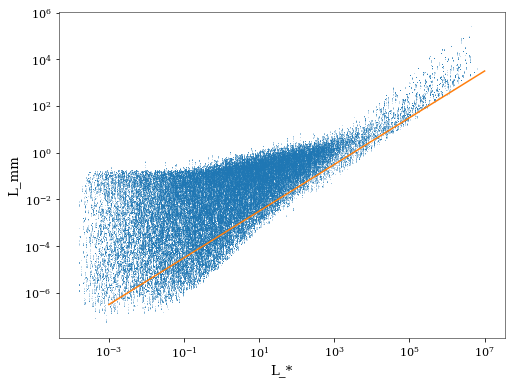

In [148]:
pl.loglog(pars['Model Luminosity'], seds.val[:,0,27] / 8.5**2, ',', alpha=0.25)
pl.loglog(np.logspace(-3,7), 10**(-3.5 + np.linspace(-3,7)))
pl.xlabel("L_*")
pl.ylabel("L_mm")

Text(0, 0.5, 'Stellar Luminosity')

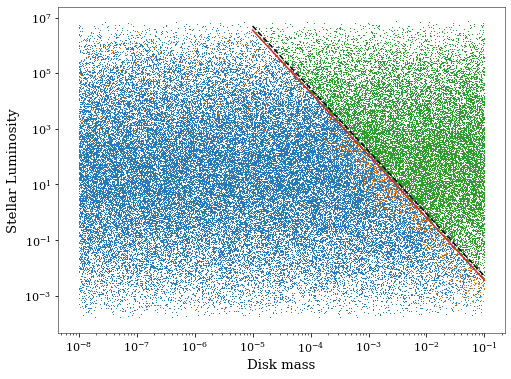

In [113]:
pl.loglog(pars['disk.mass'], pars['Model Luminosity'], ',', alpha=0.25)
detectable = seds.val[:,0,27] / 8**2 > 100*u.uJy
pl.loglog(pars['disk.mass'][detectable], pars['Model Luminosity'][detectable], ',', alpha=0.25)
detectable = (pars['disk.mass']**2.25 * pars['Model Luminosity']) > 2e-5
pl.loglog(pars['disk.mass'][detectable], pars['Model Luminosity'][detectable], ',', alpha=0.25)
pl.loglog([1e-5,1e-1], [5e6,5e-3], 'k--')
pl.loglog(np.logspace(-5,-1), 2e-5/np.logspace(-5,-1)**2.25 ) 
pl.xlabel("Disk mass")
pl.ylabel("Stellar Luminosity")

Text(0, 0.5, 'Stellar Luminosity')

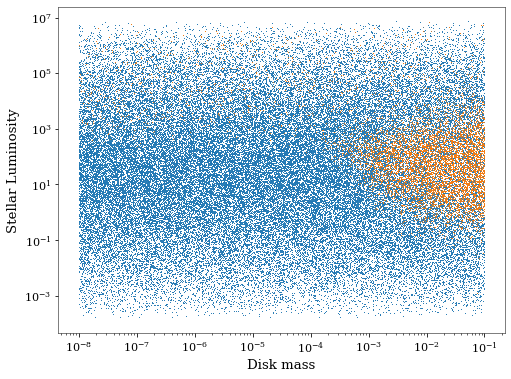

In [90]:
pl.loglog(pars['disk.mass'], pars['Model Luminosity'], ',', alpha=0.25)
detectable = seds.val[:,0,31] / 8**2 > 250*u.uJy
pl.loglog(pars['disk.mass'][detectable], pars['Model Luminosity'][detectable], ',', alpha=0.25)
pl.xlabel("Disk mass")
pl.ylabel("Stellar Luminosity")

In [96]:
seds.val[(pars['disk.mass'] > 1e-3) & (pars['Model Luminosity'] > 1e3) & ~detectable, 0, 31]

<Quantity [nan, nan, nan, ..., nan, nan, nan] mJy>